# **Project: Predict Medical Charge Using Multiple Linear Regression Method**

# 1. Introduction
### Background
In health care system, accurately predicting medical cost of individuals can not only help determine insurance cost but also guide patients for choosing the right insurance plan. It is highly useful for properly advocating limited healthcare resources. 

### Objectives
Build multiple linear regression models for predicting healthcare cost of individuals with relevant variables (age,sex, bmi, children, smoker, and region).

# 2. Contents
+ Exploratory Data Analysis (EDA)
+ Data Cleaning
+ Model Building 
++ Model Fitting
++ Model Selection
++ Model Performance
++ Model Prediction
++ Cross Validation
+ Summary

# 3. EDA

In [6]:
library(tidyverse)
library(mice)
library(plyr)
library(VIM)
library(car)
library(caret)

### Import Data

In [14]:
df <- read_csv("insurance.csv")
print(df)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,338 × 7
     age sex      bmi children smoker region    charges
   <dbl> <chr>  <dbl>    <dbl> <chr>  <chr>       <dbl>
 1    19 female  27.9        0 yes    southwest  16885.
 2    18 male    33.8        1 no     southeast   1726.
 3    28 male    33          3 no     southeast   4449.
 4    33 male    22.7        0 no     northwest  21984.
 5    32 male    28.9        0 no     northwest   3867.
 6    NA female  25.7        0 no     southeast   3757.
 7    46 female  33.4        1 no     southeast   8241.
 8    NA female  27.7        3 no     northwest   7282.
 9    37 male    29.8        2 no     northeast   6406.
10    60 female  25.8        0 no     northwest  28923.
# ℹ 1,328 more rows


### Data Summary

In [15]:
age <- df$age
sex <- df$sex
bmi <- df$bmi
children <- df$children
smoker <- df$smoker
region <- df$region
charges <- df$charges
print("Summary for continuous variables:")
summary(df[, -c(2, 5,6)])

paste("age S.D. = ",round(sd(age,na.rm = TRUE), 2))
paste("bmi S.D. = ",round(sd(bmi,na.rm = TRUE), 2))
paste("children S.D. = ",round(sd(children,na.rm = TRUE), 2))
paste("charges S.D. = ",round(sd(charges,na.rm = TRUE), 2))

[1] "Summary for continuous variables:"


      age             bmi           children         charges     
 Min.   :18.00   Min.   :15.96   Min.   :-2.000   Min.   : 1122  
 1st Qu.:26.00   1st Qu.:26.30   1st Qu.: 0.000   1st Qu.: 4740  
 Median :39.00   Median :30.40   Median : 1.000   Median : 9382  
 Mean   :39.05   Mean   :30.66   Mean   : 1.043   Mean   :13270  
 3rd Qu.:51.00   3rd Qu.:34.69   3rd Qu.: 2.000   3rd Qu.:16640  
 Max.   :64.00   Max.   :53.13   Max.   : 5.000   Max.   :63770  
 NA's   :154                                                     

[1] "age S.D. =  14.08"

[1] "bmi S.D. =  6.1"

[1] "children S.D. =  1.26"

[1] "charges S.D. =  12110.01"

In [16]:
print("Summary for categorical variables:")
table(df$sex)
table(df$smoker)
table(df$region)

[1] "Summary for categorical variables:"



female   male 
   659    666 


  no  yes 
1064  274 


     k#!a northeast northwest southeast southwest 
       24       317       317       349       320 

###  Data Visualization

##### Data Distribution

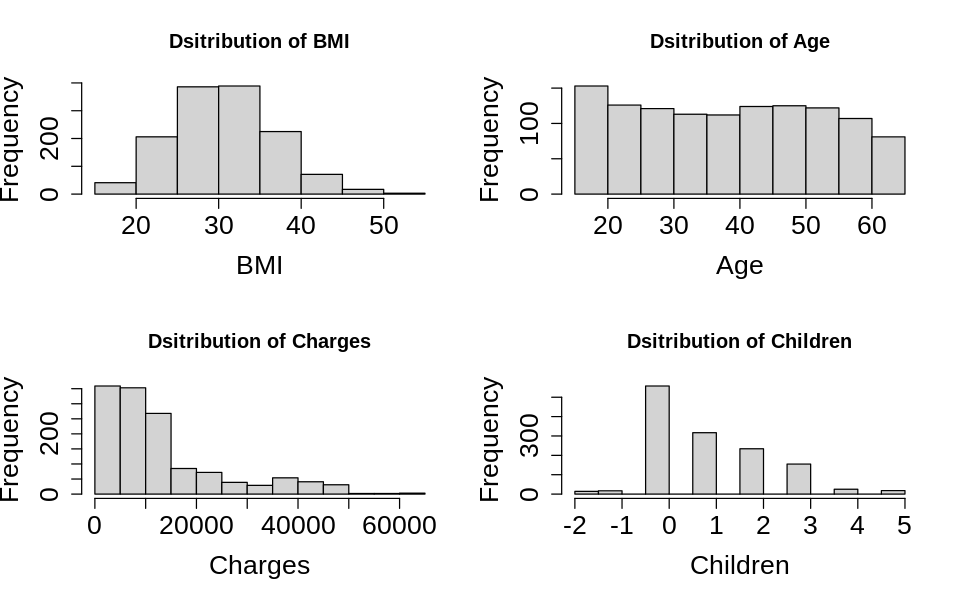

In [84]:
par(mfrow = c(2,2))
hist(df$bmi, xlab = "BMI", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of BMI")
hist(df$age, xlab = "Age", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Age")
hist(df$charges, xlab = "Charges", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Charges")
hist(df$children, xlab = "Children", cex.axis = 1.6, cex.lab = 1.6, main = "Dsitribution of Children")

##### Relationship Between Continuous Variables

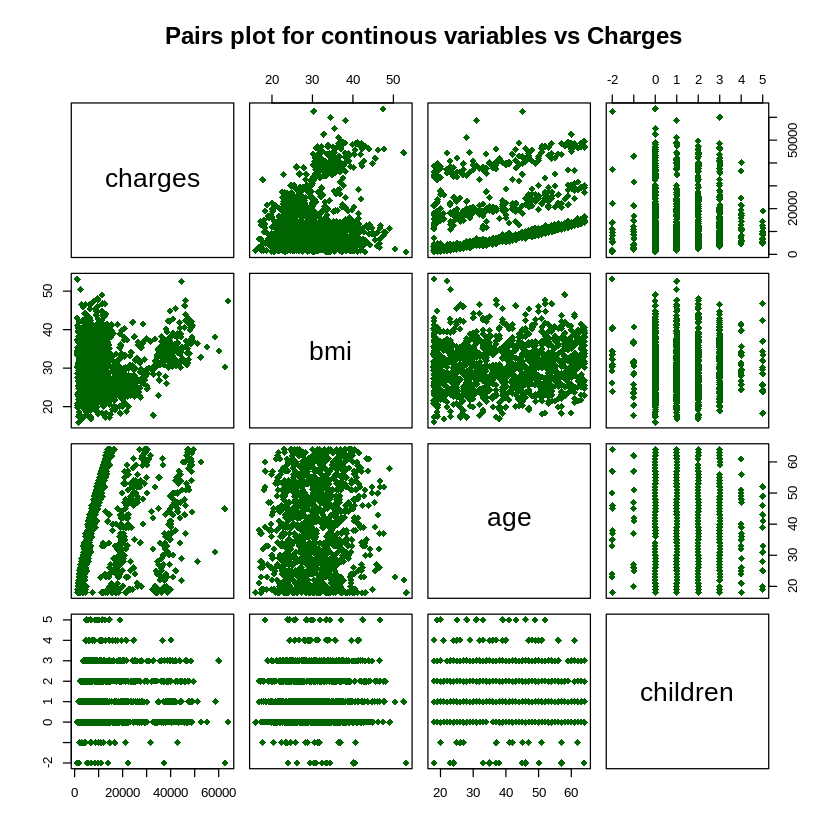

In [18]:
x <- cbind(charges,bmi,age,children) 
pairs(x,cex = 1.2, col = "darkgreen",pch = 18, 
      main = " Pairs plot for continous variables vs Charges")

##### Charge vs Categorival Variables

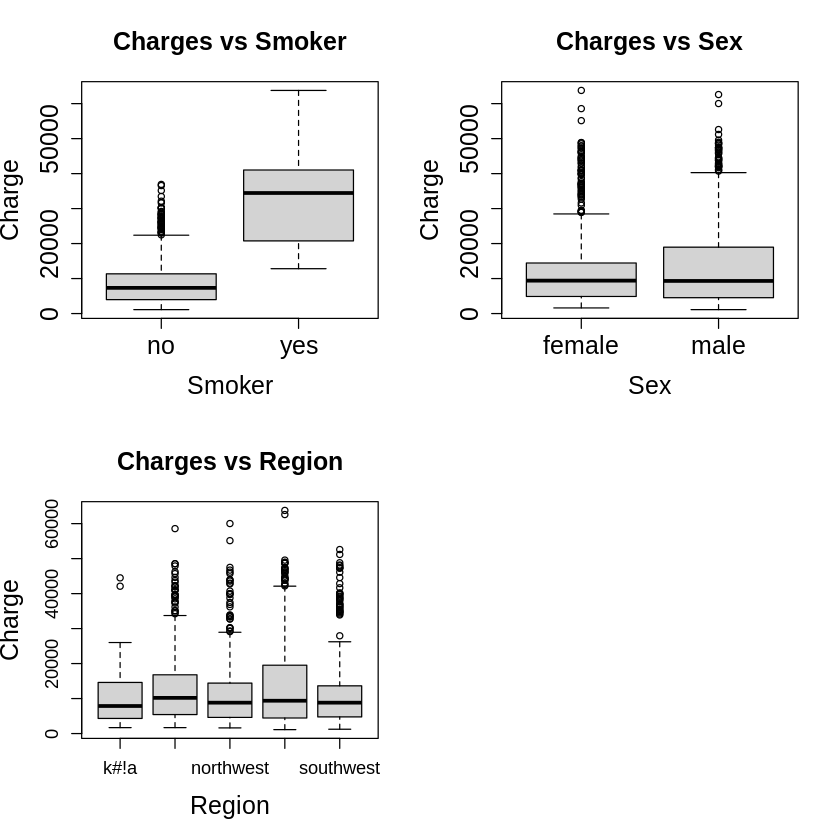

In [19]:
par(mfrow = c(2,2))
plot(df$charges ~ factor(df$smoker),ylab = "Charge",xlab = "Smoker",
     cex.axis = 1.5,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Smoker")
plot(df$charges ~ factor(df$sex),ylab = "Charge",xlab = "Sex",
     cex.axis = 1.5,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Sex")

plot(df$charges ~ factor(df$region),ylab = "Charge",xlab = "Region",
     cex.axis = 1.1,cex.lab = 1.5,cex.main = 1.5,main = "Charges vs Region")

##### Exploration Plots

Warning message:
“Removed 154 rows containing missing values (`geom_point()`).”


[1] "Legend label example: in-no means BMI in the normal range and does no smoke"


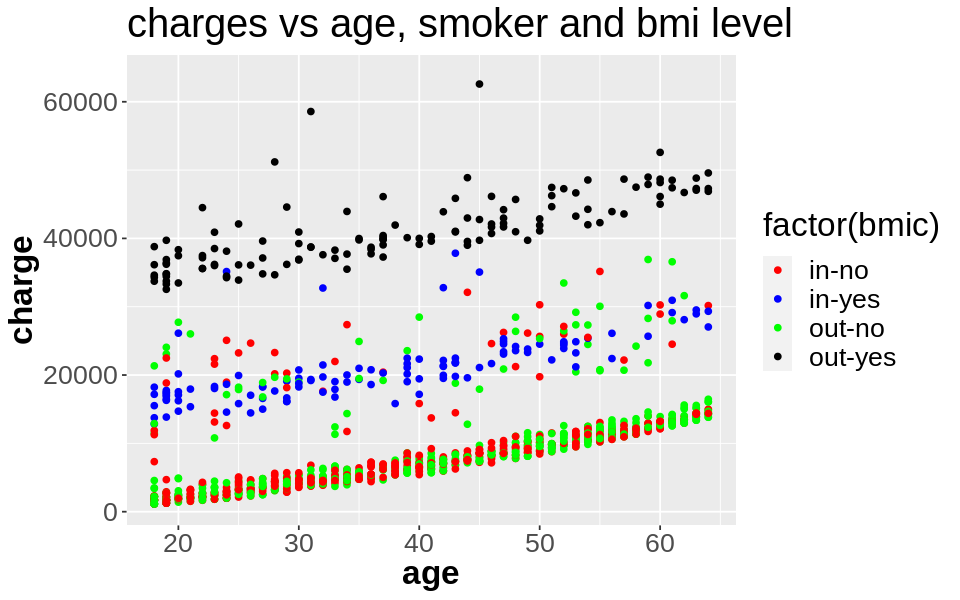

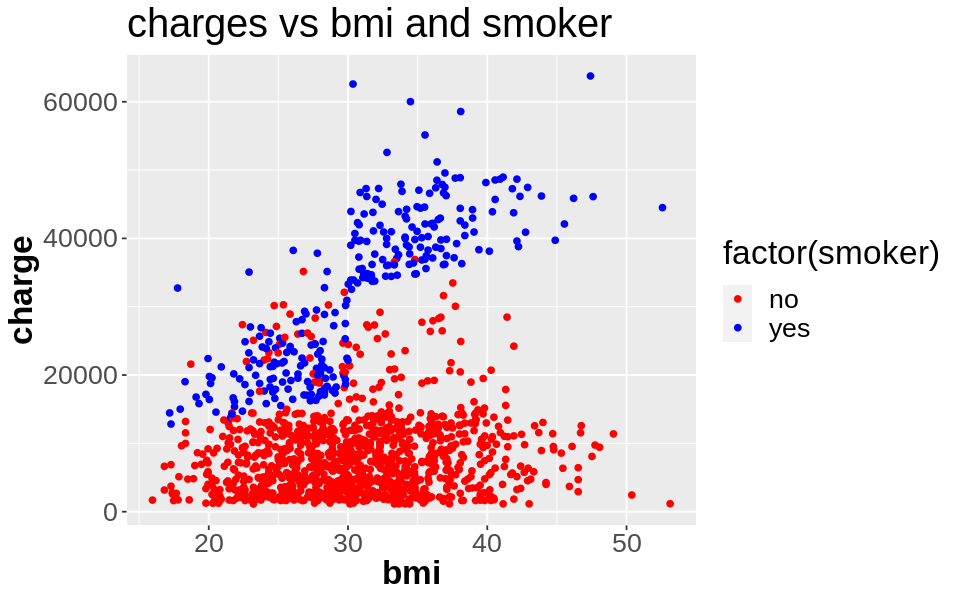

In [20]:
# Regroup by BMI (in normal range (<30) or not) and smoker (yes or no)
bmismoke <- replace(bmi, (bmi > 30) & smoker == "yes", "out-yes")
bmismoke2 <- replace(bmismoke,(bmi > 30)& smoker == "no", "out-no")
bmismoke3 <- replace(bmismoke2,(bmi <= 30) & smoker == "yes", "in-yes")
bmismoke4 <- replace(bmismoke3,(bmi <= 30) & smoker == "no", "in-no")
df2 <- mutate(df, bmic = bmismoke4)

options(repr.plot.width = 8, repr.plot.height = 5)
sp<-ggplot(data = df2) +
  geom_point(aes(x = age, y = charges, group = 1,color = factor(bmic)))+
  ylab("charge") + xlab("age") + ggtitle("charges vs age, smoker and bmi level")
sp+scale_color_manual(values = c("red", "blue", "green","black"))+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20))
print ("Legend label example: in-no means BMI in the normal range and does no smoke")

sp<-ggplot(data = df2) +
  geom_point(aes(x = bmi, y = charges, group = 1,color = factor(smoker)))+
  ylab("charge") + xlab("bmi") + ggtitle("charges vs bmi and smoker")
sp+scale_color_manual(values = c("red", "blue"))+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20)) 
df2 <- df2[, 1:7]

# 4. Data Cleaning

In [21]:
# children: no non-integer imput
length(df2$children[df2$children%%1 != 0])
# number of negetive input: 31
sum(df2$children < 0)
df2$children[df2$children < 0]
# replace with positive values
df3 <- df2
df3$children[df3$children < 0] <- abs(df3$children[df3$children < 0]) 

# region: change k#!a to NA
table(df3$region)
df3$region <- replace(df3$region, df3$region == "k#!a", NA)  # replace k#!a as NA.

[1] 0

[1] 31

[1] -2 -1 -1 -1 -2 -1 -2 -2 -2 -1 -2 -1 -1 -1 -2 -2 -1 -2 -1 -1 -1 -1 -2 -1 -2
[26] -2 -1 -1 -2 -1 -2


     k#!a northeast northwest southeast southwest 
       24       317       317       349       320 

### Missing Data Distribution

[1] "Missing patterns and pencentages:"


[1] 1

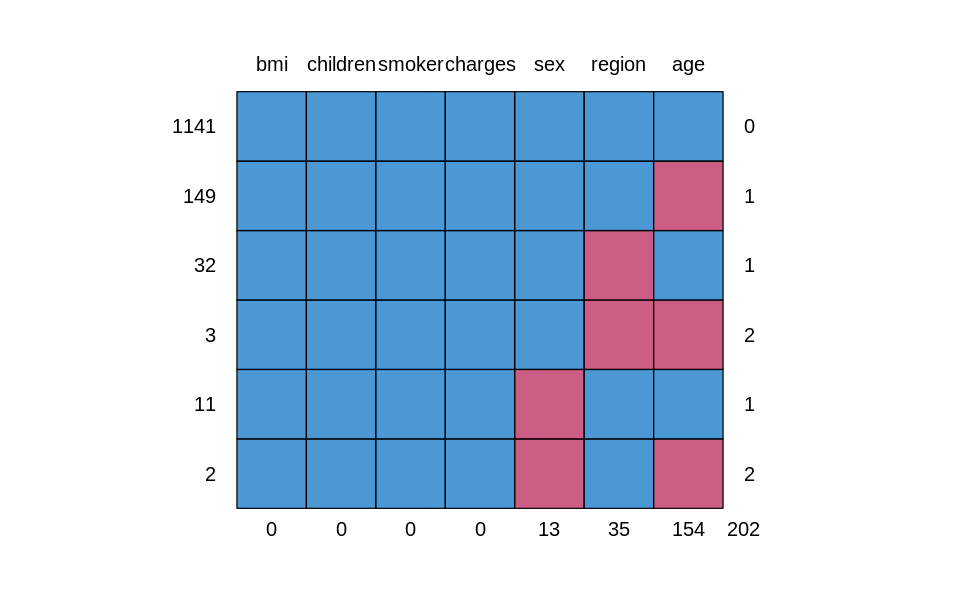


 Variables sorted by number of missings: 
 Variable       Count
      age 0.115097160
   region 0.026158445
      sex 0.009715994
      bmi 0.000000000
 children 0.000000000
   smoker 0.000000000
  charges 0.000000000


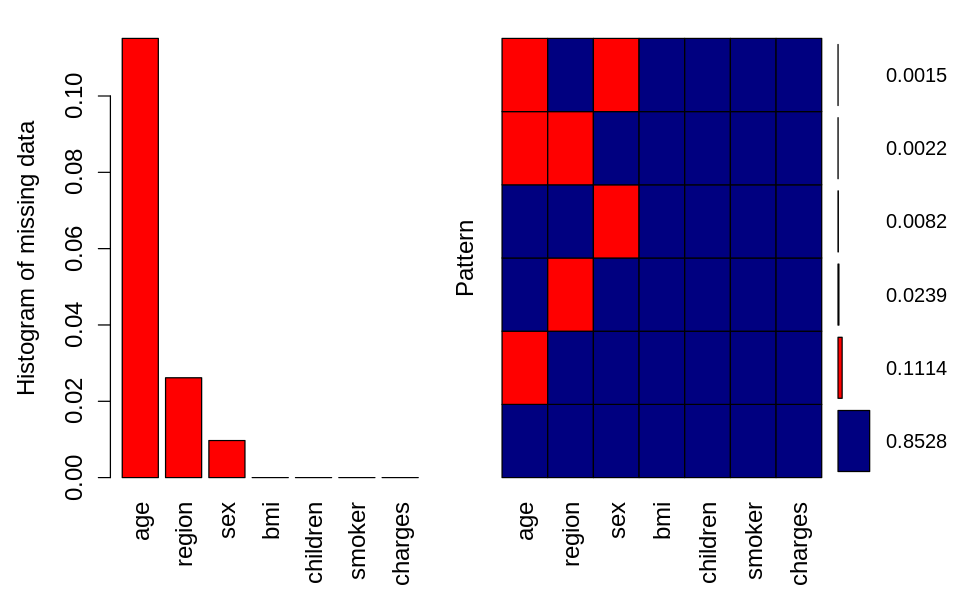

In [22]:
print("Missing patterns and pencentages:")
md.pattern(df3)[2]
aggr(df3, col = c('navyblue','red'), numbers = TRUE, sortVars = TRUE, 
     labels = names(df3), cex.axis = 1.2, gap = 3, ylab = c("Histogram of missing data","Pattern"))

### Data Imputation

In [ ]:
# age: impute using mice pmm
X <- df3[,-7]
tempData <- mice(X,m = 5,maxit = 50,meth = 'pmm',seed = 500)
completedData <- complete(tempData,2)
df4 <- cbind(completedData,df3[,7])

In [52]:
# sex: impute with mode
df4$sex[is.na(df4$sex)] <- "male"
table(df4$sex)


female   male 
   659    679 

In [53]:
# region: impute with mode
df4$region[is.na(df4$region)] <- "southeast"
print("Cleaned Data:")
head(df4)

[1] "Cleaned Data:"


,age,sex,bmi,children,smoker,region,charges
,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,34,female,25.740,0,no,southeast,3756.622


# 5. Model Building

## Train -Test

In [113]:
# Split data, 20: 80
train_ind <- sample(1:1338, round(1338*0.8), replace = FALSE) 
train <- df4[train_ind, ] 
test <- df4[-train_ind, ] 

### Check Multicollinearity

In [92]:
# Correlation matrix
x_conti <- train[, c(1,3,4)] 
print("Correlation matrix") 
cor(x_conti)

[1] "Correlation matrix"


,age,bmi,children
age,1.00000000,0.13064822,0.02092515
bmi,0.13064822,1.00000000,0.01258548
children,0.02092515,0.01258548,1.00000000


### Fit Model

In [93]:
# Full model with all 2-factor interactions
g1 <- lm(charges ~.^2, data = train)
# summary(g1)
Anova(g1,type = 3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.077013e+07,1,4.223352e-01,5.159182e-01
age,8.554971e+07,1,3.354709e+00,6.730005e-02
sex,1.583887e+06,1,6.210985e-02,8.032412e-01
bmi,7.965058e+06,1,3.123384e-01,5.763696e-01
children,2.907310e+07,1,1.140060e+00,2.858884e-01
smoker,2.728001e+09,1,1.069747e+02,6.280064e-24
region,1.511724e+08,3,1.976003e+00,1.158719e-01
age:sex,5.597514e+05,1,2.194985e-02,8.822494e-01
age:bmi,8.236857e+07,1,3.229966e+00,7.259336e-02


### Model Selection

In [94]:
# Keep all main and bmi*smoker terms
g2 <- lm(charges ~. + bmi*smoker, data = train)
# summary(g2)
Anova(g2, type = 3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.055455e+06,1,3.550870e-01,5.513748e-01
age,1.227380e+10,1,4.812862e+02,2.985328e-88
sex,5.288645e+07,1,2.073810e+00,1.501421e-01
bmi,1.480653e+05,1,5.806008e-03,9.392766e-01
children,3.554353e+08,1,1.393750e+01,1.990376e-04
smoker,3.445149e+09,1,1.350929e+02,1.772763e-29
region,2.433474e+08,3,3.180753e+00,2.328843e-02
bmi:smoker,1.500990e+10,1,5.885755e+02,9.047360e-104
Residuals,2.703220e+10,1060,NA,NA


In [106]:
# Keep sig. main and the interaction terms
g3 <- lm(charges ~.- sex + bmi*smoker, data = train)
print ("ANOVA Table (type 3):")
Anova(g3,type = 3)

[1] "ANOVA Table (type 3):"


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.709150e+07,1,6.695226e-01,4.134018e-01
age,1.234660e+10,1,4.836515e+02,1.281316e-88
bmi,4.790684e+04,1,1.876647e-03,9.654544e-01
children,3.492011e+08,1,1.367920e+01,2.279548e-04
smoker,3.410903e+09,1,1.336148e+02,3.420560e-29
region,2.426445e+08,3,3.168359e+00,2.368279e-02
bmi:smoker,1.495733e+10,1,5.859210e+02,2.040665e-103
Residuals,2.708509e+10,1061,NA,NA


### Model Performance

In [123]:
print ("Summary:")
summary(g3)

print("Baseline used")
contrasts(factor(train$smoker))
contrasts(factor(train$region))
# smoker baseline: no
# ref:northeast". 1-3:"northwest" "southeast" "southwest"

[1] "Summary:"



Call:
lm(formula = charges ~ . - sex + bmi * smoker, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16454.1  -2026.6  -1379.5    -16.6  23682.7 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -817.309    998.858  -0.818 0.413402    
age                242.056     11.006  21.992  < 2e-16 ***
bmi                  1.291     29.810   0.043 0.965454    
children           471.343    127.440   3.699 0.000228 ***
smokeryes       -22742.678   1967.498 -11.559  < 2e-16 ***
regionnorthwest   -716.637    457.138  -1.568 0.117259    
regionsoutheast  -1188.886    444.422  -2.675 0.007585 ** 
regionsouthwest  -1223.729    450.566  -2.716 0.006715 ** 
bmi:smokeryes     1518.445     62.731  24.206  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5053 on 1061 degrees of freedom
Multiple R-squared:  0.8299,	Adjusted R-squared:  0.8286 
F-statistic: 647.2 on 8 and 1061 DF,  p-

[1] "Baseline used"


,yes
no,0
yes,1


,northwest,southeast,southwest
northeast,0,0,0
northwest,1,0,0
southeast,0,1,0
southwest,0,0,1


### Prediction on Test Set

In [130]:
pred <- predict (g3, test)
print("RMSE of the Test Set: ")
round(sqrt(sum((pred - test$charges)^2)/dim(test)[1]), 2)

[1] "RMSE of the Test Set: "


[1] 5288.18

### Confidence Intervals of the Estimates

In [111]:
print ("95% CI for the Estimates:")
confint(g3) 

[1] "95% CI for the Estimates:"


,2.5 %,97.5 %
(Intercept),-2777.27162,1142.65271
age,220.45874,263.65268
bmi,-57.20265,59.78544
children,221.27935,721.40650
smokeryes,-26603.30759,-18882.04852
regionnorthwest,-1613.63427,180.36038
regionsoutheast,-2060.93252,-316.83991
regionsouthwest,-2107.83143,-339.62631
bmi:smokeryes,1395.35516,1641.53554


### Residaul Plots

[1] "Residual Plots"


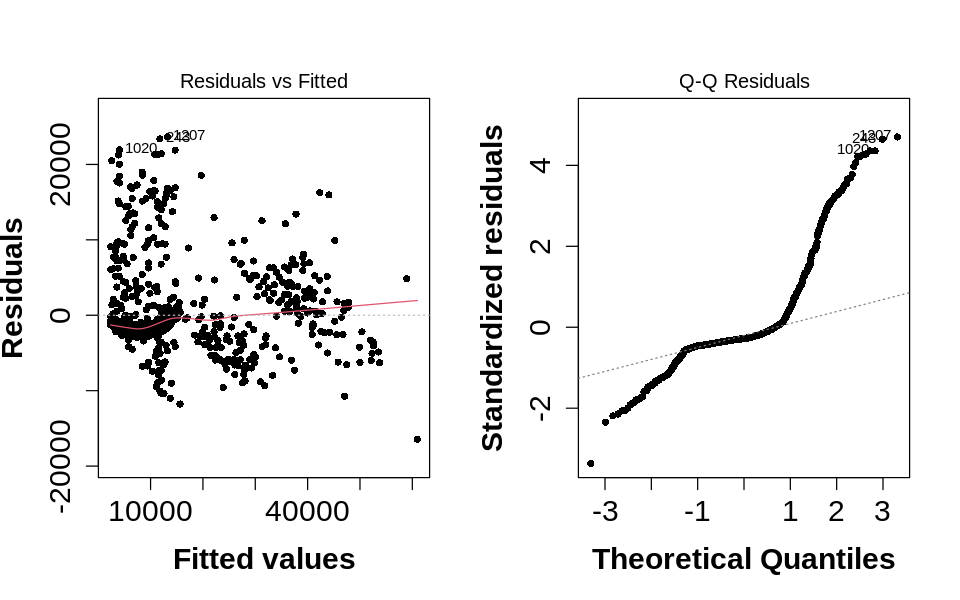

In [109]:
print ("Residual Plots")
layout(matrix(c(1,2), 1, 2, byrow = F)) 
plot(g3,1:2, col = "black", pch = 16, cex = 0.8, cex.axis = 1.5, 
cex.lab = 1.5, font.lab = 2.5)

In [97]:
# Compare to the model without bmi * smoker effect
g4 <- lm(charges ~ . - sex, data = train)
summary(g4)
# Smoking increases medical charge
# R^2 decreases from 0.83 to 0.74


Call:
lm(formula = charges ~ . - sex, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-20328  -2944  -1043   1644  25074 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -10385.47    1142.33  -9.091  < 2e-16 ***
age                234.61      13.70  17.123  < 2e-16 ***
bmi                320.76      33.29   9.637  < 2e-16 ***
children           416.92     158.68   2.627  0.00873 ** 
smokeryes        23972.85     476.51  50.310  < 2e-16 ***
regionnorthwest   -590.50     569.24  -1.037  0.29981    
regionsoutheast  -1100.11     553.42  -1.988  0.04709 *  
regionsouthwest  -1084.66     561.04  -1.933  0.05347 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6292 on 1062 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7343 
F-statistic:   423 on 7 and 1062 DF,  p-value: < 2.2e-16


## Cross Validation

### Fit Model and Summary - CV

In [99]:
ctrl <- trainControl(method = "cv", number = 5)

# Fit a regression model and use k-fold CV to evaluate performance
model_cv <- train(charges ~.- sex + bmi*smoker, data = train, method = "lm", trControl = ctrl)

# Summary of k-fold CV 
print ("k-fold CV Summary:")              
print(model_cv)

[1] "k-fold CV Summary:"
Linear Regression 

1070 samples
   6 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 856, 856, 855, 857, 856 
Resampling results:

  RMSE      Rsquared   MAE     
  5043.372  0.8296699  3180.337

Tuning parameter 'intercept' was held constant at a value of TRUE


### Model Coefficients - CV

In [103]:
print("Model Coefficients:")
model_cv$finalModel

[1] "Model Coefficients:"



Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
    (Intercept)              age              bmi         children  
       -817.309          242.056            1.291          471.343  
      smokeryes  regionnorthwest  regionsoutheast  regionsouthwest  
     -22742.678         -716.637        -1188.886        -1223.729  
`bmi:smokeryes`  
       1518.445  


### Model Performance - CV

In [102]:
#view predictions for each fold
model_cv$resample

RMSE,Rsquared,MAE,Resample
<dbl>,<dbl>,<dbl>,<chr>
5501.156,0.7805200,3461.254,Fold1
4196.832,0.8859136,2859.207,Fold2
5489.432,0.8092874,3320.120,Fold3
4938.141,0.8340172,2999.318,Fold4
5091.298,0.8386112,3261.784,Fold5


# 6. Summary
In this project, multiple linear regression, train-test, and cross validation procedures were used to build prediction models for medical charges of insured individuals with provided variables (age, bmi, children number, smoker, sex, region). The sex variable was found to be insignificant at $α = 0.05$, while other main variable (age, number of children, smoker, and region) and the smoker/bmi interaction were found to be significant. The final model is shown in the equation below. The model fits the data well with $R^2=0.83$ and the model performance is quite consistent throughout different cross validation test folds. From the model, it is seen that Individuals who smoke tend to have higher medical costs considering both the main and smoker * bmi (bmi range: 15.96 - 53.13) interaction effects.  And individuals from Northeast with more children, higher BMI values, and higher ages are predicted to have higher healthcare charges. For example, people are predicted to have 242.056 dollars more medical charge being 1 year older and have 471.343 dollars more charge with 1 more child. <br>

$$\hat{charges} = - 817.309 + 242.056  \times age + 1.291 \times bmi + 471.343 \times children - 22742.678 * I_{ysmk} - 716.637 \times I_{nw} - 1188.886 \times I_{se} - 1223.729\times I_{sw} + 1518.445 \times I_{ysmk} * bmi$$

Where $I_{ysmk}$ indicates smoking, $I_{nw}$, $I_{se}$, and $I_{sw}$ are the indicators that the individual is from the NW,SE, and SW of the US, respectively. 
